사과값 예측

* 사과값(x) = 가중치 * x + 편향치
* 3 개의 알려진 사과값으로부터 확률 경사 강하법(SGD)으로 가중치와 편향치를 근사함

Iter. 0: Weights: [2270.7354058], Bias: [299.3760198], Loss: 4903326.4828040125
Iter. 250: Weights: [1996.7531551], Bias: [39.1751312], Loss: 468.2170484134122
Iter. 500: Weights: [1999.21901426], Bias: [6.0074434], Loss: 8.174327098389451
Iter. 750: Weights: [1999.85819196], Bias: [0.97432416], Loss: 0.2381841260347233
Iter. 1000: Weights: [1999.98113725], Bias: [0.22874011], Loss: 0.016052754961090727
Iter. 1250: Weights: [1999.98488173], Bias: [0.10891575], Loss: 0.00281452450593182
Iter. 1500: Weights: [1999.98736886], Bias: [0.0927881], Loss: 0.0020072453315828596
Iter. 1750: Weights: [1999.99176796], Bias: [0.08882091], Loss: 0.002128842696083907
Iter. 2000: Weights: [1999.99153354], Bias: [0.08853177], Loss: 0.002047081261296632
Iter. 2250: Weights: [1999.99140504], Bias: [0.0890303], Loss: 0.0020505011257384255
Iter. 2500: Weights: [1999.992174], Bias: [0.09051677], Loss: 0.0023848093775285253
Iter. 2750: Weights: [1999.98688704], Bias: [0.08846594], Loss: 0.002016321209022539


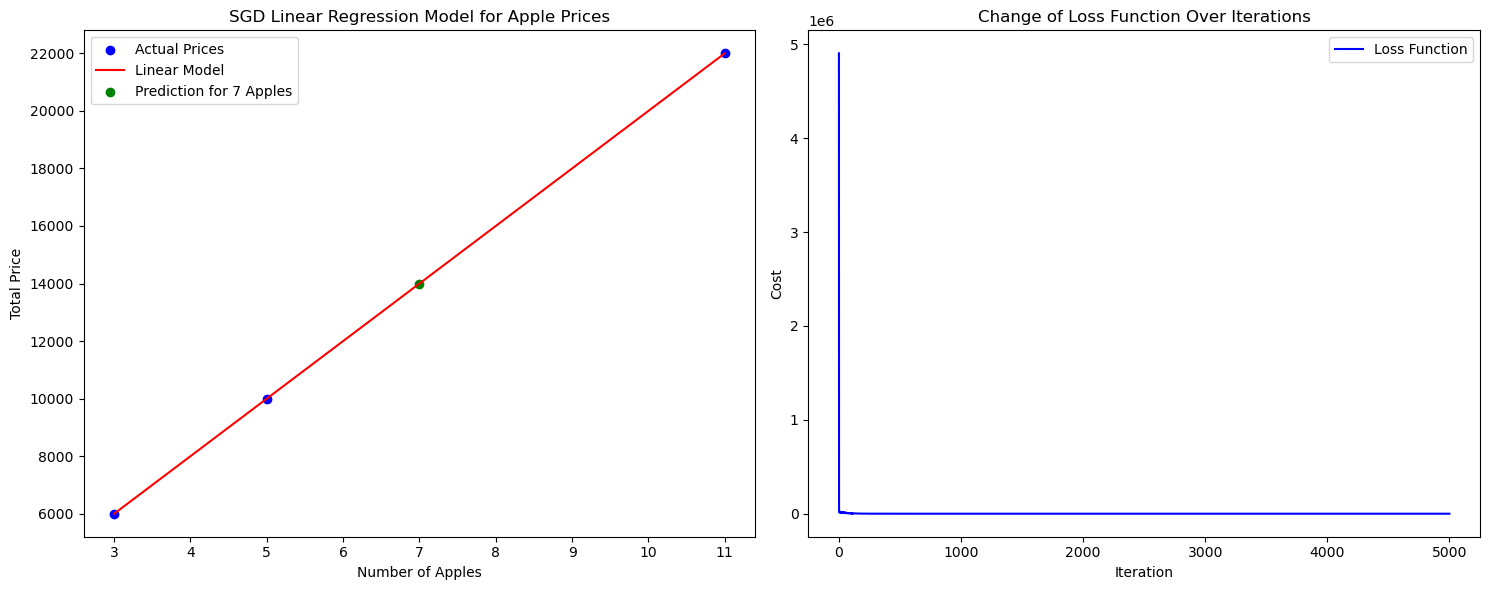

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# X와 Y 값을 미리 준비한다. 3개에 6,000원 5개에 만 원, 11개에 2만 2천원

X = np.array([3, 5, 11]).reshape(-1, 1)
Y = np.array([6000, 10000, 22000])

# Stochastic Gradient Descent 방법으로 regression함
# 중간마다 값을 찍을 것이므로 max_iter = 1을 넣어 초기화

sgd_regressor = SGDRegressor(max_iter=1, tol=None, learning_rate='constant')

# 총 3000 회 반복하면서 Loss 함수를 최소화함
# 여기서 Loss 함수는 mean squared error로 예측 값과 실제 값의 제곱 평균값
# 150회마다 weight, bias, loss를 출력

n_iterations = 5001
loss_history = []
for iteration in range(n_iterations):
    sgd_regressor.partial_fit(X, Y)
    predictions = sgd_regressor.predict(X)
    loss = np.mean((predictions - Y) ** 2)  # Mean Squared Error Loss 함수 계산
    loss_history.append(loss)
    if iteration % 250 == 0:
        print(f"Iter. {iteration}: Weights: {sgd_regressor.coef_}, Bias: {sgd_regressor.intercept_}, Loss: {loss}")

# 사과가 7개일 때의 값 계산 (14,000 원에 근사한 값이 나와야 함)

X_test = np.array([[7]])
predicted_price = sgd_regressor.predict(X_test)

print(f"\nThe predicted price for 7 apples is: {predicted_price[0]:.2f} KRW")

# 모델 파라메터 값 출력

print(f"Final Weights: {sgd_regressor.coef_}")
print(f"Final Bias: {sgd_regressor.intercept_}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 회귀 선 출력
ax1.scatter(X, Y, color='blue', label='Actual Prices')
ax1.plot(X, sgd_regressor.predict(X), color='red', label='Linear Model')
ax1.scatter(X_test, predicted_price, color='green', label='Prediction for 7 Apples')
ax1.set_xlabel('Number of Apples')
ax1.set_ylabel('Total Price')
ax1.set_title('SGD Linear Regression Model for Apple Prices')
ax1.legend()

# Loss가 최소화되는 과정 추적
ax2.plot(range(n_iterations), loss_history, label='Loss Function', color='blue')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.set_title('Change of Loss Function Over Iterations')
ax2.legend()

plt.tight_layout()
plt.show()

Logistic regression

In [9]:
import pandas as pd

df = pd.read_excel("week8_sam3_testset.xlsx")
# 이진 분류를 할 것이므로 0, 1인 것만 따로 꺼낸다
X = df[df["class"].isin([0,1])]
y = X.pop("class")
X

,land_command,water_command,force,intelligence,politics,charm
1,43,54,75,42,36,67
2,50,21,54,51,43,46
3,63,19,64,62,58,67
4,53,25,54,70,62,49
5,70,21,75,44,30,52
...,...,...,...,...,...,...
361,37,19,48,62,75,52
362,42,17,63,47,42,31
363,46,13,60,51,53,62
364,74,29,80,30,21,61


In [11]:
ewq = pd.read_excel("week11_sam3_answer.xlsx")


In [14]:
ewq

,land_command,water_command,force,intelligence,politics,charm,class
0,72,70,21,84,80,62,0
1,83,72,92,37,30,55,1
2,66,26,72,58,47,51,1
3,36,11,42,68,73,79,0
4,90,76,95,67,64,87,1
5,65,24,66,59,52,67,1
6,63,20,72,43,29,53,1
7,62,31,68,51,40,39,1
8,73,70,70,61,72,71,1
9,21,13,25,58,69,72,0


In [3]:
# train test 세트를 구분해주는 함수
from sklearn.model_selection import train_test_split
# StandardScaler 는 Z score로 정규화
from sklearn.preprocessing import StandardScaler
# MinMaxScaler는 최소 최대값으로 정규화
from sklearn.preprocessing import MinMaxScaler

# 데이터를 정규화해줌
X_fit_Z = StandardScaler().fit_transform(X)
print(X_fit_Z)

X_fit_MinMax = MinMaxScaler().fit_transform(X)
print(X_fit_MinMax)

[[-0.69263129  3.02378336  1.24253493 -0.66446473 -0.67478135  1.01529502]
 [-0.17524406 -0.27313151 -0.32812573  0.01429283 -0.27593204 -0.30398055]
 [ 0.78561793 -0.47294453  0.41980792  0.84388541  0.57874505  1.01529502]
 ...
 [-0.47089391 -1.0723836   0.12063446  0.01429283  0.29385269  0.70118179]
 [ 1.59865501  0.52612058  1.61650175 -1.56947482 -1.52945845  0.63835914]
 [ 0.78561793  2.72406383  0.71898137 -1.56947482 -1.47247997  0.07295533]]
[[0.49206349 0.75757576 0.88235294 0.45454545 0.41891892 0.73076923]
 [0.6031746  0.25757576 0.57352941 0.59090909 0.51351351 0.46153846]
 [0.80952381 0.22727273 0.72058824 0.75757576 0.71621622 0.73076923]
 ...
 [0.53968254 0.13636364 0.66176471 0.59090909 0.64864865 0.66666667]
 [0.98412698 0.37878788 0.95588235 0.27272727 0.21621622 0.65384615]
 [0.80952381 0.71212121 0.77941176 0.27272727 0.22972973 0.53846154]]


In [4]:
from sklearn.linear_model import LogisticRegression

# Train과 test 세트로 나누되, 7:3로 label을 같은 비율로 무작위로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_fit_Z, y, test_size=0.3, stratify=y, random_state=43)
#X_train, X_test, y_train, y_test = train_test_split(X_fit_MinMax, y, test_size=0.3, stratify=y, random_state=43)

log_r = LogisticRegression()
log_r.fit(X_train, y_train)
y_pred = log_r.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

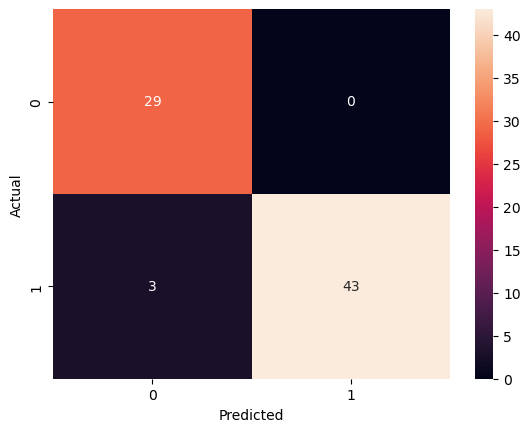

In [5]:
import seaborn as sns

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [6]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.93      0.97        46

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75



In [7]:
print("Precision (Pos):", metrics.precision_score(y_test, y_pred)) # Precision (Positive)
print("Precision (Neg):", metrics.precision_score(y_test, y_pred, pos_label=0)) # Precision (Neg)

print("Recall (Pos):", metrics.recall_score(y_test, y_pred)) # Recall (Positive)
print("Recall (Neg):", metrics.recall_score(y_test, y_pred, pos_label=0)) # Recall (Neg)

print("F1 (Pos):", metrics.f1_score(y_test, y_pred)) # f1 (Positive)
print("F1 (Neg):", metrics.f1_score(y_test, y_pred, pos_label=0)) # f1 (Neg)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # accuracy

print("MCC:", metrics.matthews_corrcoef(y_test, y_pred)) # MCC

Precision (Pos): 1.0
Precision (Neg): 0.90625
Recall (Pos): 0.9347826086956522
Recall (Neg): 1.0
F1 (Pos): 0.9662921348314607
F1 (Neg): 0.9508196721311475
Accuracy: 0.96
MCC: 0.9204057470107597


In [8]:
# Coefficient 값과 intercept 값 계산

coef = log_r.coef_[0]
intercept = log_r.intercept_[0]

for n, c in enumerate(coef):
  print(f"{X.columns[n]}: {c:.3f}")

print(f"Intercept: {intercept:.3f}")

land_command: 1.540
water_command: 0.484
force: 1.168
intelligence: -1.675
politics: -1.736
charm: -1.433
Intercept: 1.059
